# Example: Loss in a WR-6.5 Waveguide Loaded with HDPE

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

from waveguide import conductor_loss, dielectric_loss, cutoff_frequency

plt.style.use(["science", "notebook"])

In [2]:
# Relative permittivity
er = 2.3

In [3]:
# Waveguide dimensions
a, b = 65 * sc.mil, 65 * sc.mil / 2

In [4]:
# Cutoff frequencies
print("TE10 cutoff: {:.1f} GHz".format(cutoff_frequency(a, b=b, er=er, m=1, n=0)/1e9))
print("TE20 cutoff: {:.1f} GHz".format(cutoff_frequency(a, b=b, er=er, m=2, n=0)/1e9))

TE10 cutoff: 59.9 GHz
TE20 cutoff: 119.7 GHz


In [5]:
# Frequency sweep
f = np.linspace(60e9, 200e9, 501)
fghz = f / 1e9

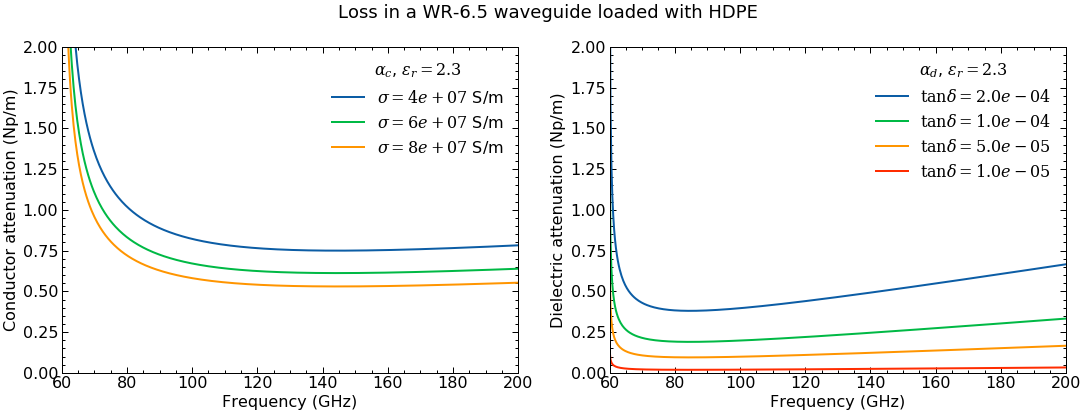

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Loss in a WR-6.5 waveguide loaded with HDPE", fontsize=18)

cond = [4e7, 6e7, 8e7]
for _cond in cond:
    alpha_c = conductor_loss(f, _cond, a, b, er=er)
    ax1.plot(fghz, alpha_c, label=r"$\sigma={:.0e}$ S/m".format(_cond))
ax1.legend(title=r"$\alpha_c$, $\varepsilon_r=2.3$")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Conductor attenuation (Np/m)")
ax1.set_xlim([60, 200])
ax1.set_ylim([0, 2])

tand = [1e-5, 5e-5, 1e-4, 2e-4]
tand.reverse()
for _tand in tand:
    _er = er * (1 - 1j * _tand)
    alpha_d = dielectric_loss(f, a, b=b, er=_er)
    ax2.plot(fghz, alpha_d, label=r"$\tan\delta={:.1e}$".format(_tand))
ax2.legend(title=r"$\alpha_d$, $\varepsilon_r=2.3$")
ax2.set_xlabel("Frequency (GHz)")
ax2.set_ylabel("Dielectric attenuation (Np/m)")
ax2.set_xlim([60, 200])
ax2.set_ylim([0, 2]);